# INTRODUCTION

## EDA for the water quality dataset

### Data Preparation

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

The `txtdata` string shows the indications for the `safe` and `dangerous` pertaining to each variable. (__Take not that they are not related to the overall `is_safe` water quality, just an indication of the dangerous amounts of each element__)

(But of course, we can use this set of indicators to interpret how do they affect and predict the overall `is_safe`, later on)

In [3]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


A function to extract all of the __threshold values__ from the abovementioned `txtdata` file, to be used later to create __binary categorical columns__ for each of the variables. 

In [4]:
Data=pd.read_csv('waterQuality1.csv')
Data

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7999 rows x 21 columns]

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Notice that `ammonia` has inconsistent data of `object`. We need to correct the data and replace `#NUM!`

In [6]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [8]:
OriginalDataForLDA.is_safe.value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

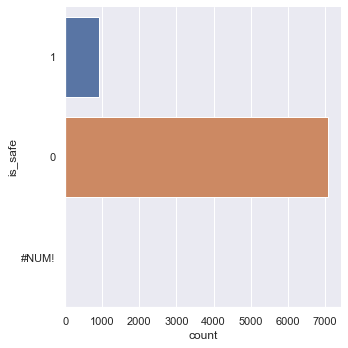

In [9]:

sb.catplot(y = 'is_safe', data = OriginalDataForLDA, kind = "count")

__High imbalance__ between 1 and 0, the training model may __overtrain negatives__ and __undertrain from positive ones__. Resulting in __low accuracy__ for the positives. 

In [10]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [11]:
OriginalDataForLDA.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [12]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [13]:
data_0 = data_0.sample(n=7084)

In [14]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [15]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

__imbalanced-learn__ offers  re-sampling techniques commonly used in datasets showing strong __between-class imbalance__. 

 Re-sampling techniques are divided into two categories mainly;
<ul>
<li>Under-sampling the majority class(es).</li>
<li>Over-sampling the minority class.</li>
</ul>

In this case we adopt the `RandomUnderSampler`
where it randomly deletes the rows of the majority class(es).

<code>
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=1) 
X_smote, y_smote = under.fit_resample(X_train, y_train)
</code>

In [16]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [17]:
resampled=v_rus
resampled_variable=u_rus

In [18]:
resampled = resampled.to_frame(name="is_safe")

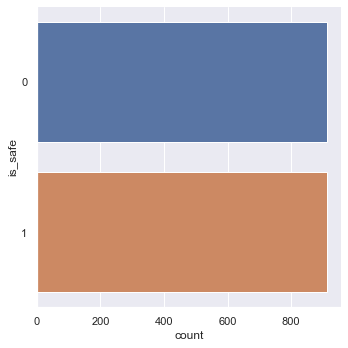

In [19]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of `is_safe` == __1__ and `is_safe` == __0__ are now equal

In [20]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          0.07     2.97     0.20    3.43    0.040        3.62      0.13   
1          0.04    12.82     0.05    0.48    0.030        0.42      0.10   
2          4.81    20.50     0.77    2.07    0.070        6.53      0.58   
3          1.76    29.10     0.01    2.38    0.009        3.42      0.86   
4          0.11    15.41     0.03    0.34    0.001        7.99      0.14   
...         ...      ...      ...     ...      ...         ...       ...   
1819       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
1820       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
1821       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
1822       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
1823       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       1.22      0.46      0.37  ...  0.105      9.54      1.20    0.005   
1       1.89      0.90      0.00  ...  0.002      8.30      1.80    0.001   
2       0.11      1.22      0.52  ...  0.176      3.84      1.85    0.006   
3       1.61      1.39      0.09  ...  0.043     16.10      1.13    0.000   
4       0.80      0.25      0.64  ...  0.096     13.07      1.38    0.009   
...      ...       ...       ...  ...    ...       ...       ...      ...   
1819    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
1820    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
1821    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
1822    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
1823    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           28.04    5.64      0.09    0.15     0.08        0  
1            0.28    3.96      0.03    0.04     0.04        0  
2           39.46    0.82      0.01    0.47     0.08        0  
3           39.60    3.60      0.04    0.12     0.05        0  
4           28.26    7.43      0.06    0.08     0.04        0  
...           ...     ...       ...     ...      ...      ...  
1819         3.57    2.13      0.09    0.06     0.03        1  
1820         1.48    1.11      0.09    0.10     0.08        1  
1821         1.35    4.84      0.00    0.04     0.05        1  
1822         0.00    0.00      0.00    0.00     0.00        1  
1823         1.35    4.84      0.00    0.04     0.05        1  

[1824 rows x 21 columns]

In [21]:
DataCopy=OriginalDataForLDA.copy()

DataCopy.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [22]:
DescribeFrame=Data.describe()
DescribeFrame

aluminium      ammonia      arsenic       barium      cadmium  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.666158    14.272857     0.161445     1.567715     0.042806   
std       1.265145     8.881569     0.252590     1.216091     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.560000     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.130000     0.100000     2.480000     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      2.176831     0.247226     0.805857     0.771565     0.319665   
std       2.567027     0.270640     0.653539     0.435373     0.329485   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.100000     0.050000     0.090000     0.405000     0.000000   
50%       0.530000     0.090000     0.750000     0.770000     0.220000   
75%       4.240000     0.440000     1.390000     1.160000     0.610000   
max       8.680000     0.900000     2.000000     1.500000     1.000000   

           viruses         lead     nitrates     nitrites      mercury  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.328583     0.099450     9.818822     1.329961     0.005194   
std       0.378096     0.058172     5.541331     0.573219     0.002967   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002000     0.048000     5.000000     1.000000     0.003000   
50%       0.008000     0.102000     9.930000     1.420000     0.005000   
75%       0.700000     0.151000    14.610000     1.760000     0.008000   
max       1.000000     0.200000    19.830000     2.930000     0.010000   

       perchlorate       radium     selenium       silver      uranium  
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000  
mean     16.460299     2.920548     0.049685     0.147781     0.044673  
std      17.687474     2.323009     0.028770     0.143551     0.026904  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       2.170000     0.820000     0.020000     0.040000     0.020000  
50%       7.740000     2.410000     0.050000     0.080000     0.050000  
75%      29.480000     4.670000     0.070000     0.240000     0.070000  
max      60.010000     7.990000     0.100000     0.500000     0.090000

We encode the data accordingly to save levels of each components

In [23]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [24]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [25]:
OriginalDataForLDA

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          0.07     2.97     0.20    3.43    0.040        3.62      0.13   
1          0.04    12.82     0.05    0.48    0.030        0.42      0.10   
2          4.81    20.50     0.77    2.07    0.070        6.53      0.58   
3          1.76    29.10     0.01    2.38    0.009        3.42      0.86   
4          0.11    15.41     0.03    0.34    0.001        7.99      0.14   
...         ...      ...      ...     ...      ...         ...       ...   
1819       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
1820       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
1821       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
1822       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
1823       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...  bacteria_bin  viruses_bin   lead_bin  \
0       1.22      0.46      0.37  ...     Dangerous         Safe  Dangerous   
1       1.89      0.90      0.00  ...     Dangerous    Dangerous  Dangerous   
2       0.11      1.22      0.52  ...     Dangerous    Dangerous  Dangerous   
3       1.61      1.39      0.09  ...     Dangerous    Dangerous  Dangerous   
4       0.80      0.25      0.64  ...     Dangerous    Dangerous  Dangerous   
...      ...       ...       ...  ...           ...          ...        ...   
1819    0.03      1.37      0.00  ...     Dangerous    Dangerous  Dangerous   
1820    0.02      1.48      0.00  ...     Dangerous    Dangerous  Dangerous   
1821    0.02      0.91      0.00  ...     Dangerous    Dangerous  Dangerous   
1822    0.09      0.00      0.00  ...     Dangerous    Dangerous  Dangerous   
1823    0.03      1.00      0.00  ...     Dangerous    Dangerous  Dangerous   

      nitrates_bin  nitrites_bin  mercury_bin  perchlorate_bin  radium_bin  \
0        Dangerous     Dangerous    Dangerous             Safe   Dangerous   
1             Safe     Dangerous    Dangerous             Safe        Safe   
2        Dangerous     Dangerous    Dangerous             Safe   Dangerous   
3             Safe     Dangerous    Dangerous             Safe        Safe   
4             Safe     Dangerous    Dangerous             Safe        Safe   
...            ...           ...          ...              ...         ...   
1819     Dangerous     Dangerous         Safe        Dangerous   Dangerous   
1820          Safe     Dangerous    Dangerous             Safe        Safe   
1821          Safe     Dangerous    Dangerous             Safe        Safe   
1822     Dangerous     Dangerous         Safe             Safe        Safe   
1823          Safe     Dangerous    Dangerous             Safe   Dangerous   

      selenium_bin  silver_bin  
0             Safe   Dangerous  
1             Safe   Dangerous  
2             Safe   Dangerous  
3             Safe   Dangerous  
4             Safe        Safe  
...            ...         ...  
1819          Safe   Dangerous  
1820          Safe   Dangerous  
1821          Safe   Dangerous  
1822          Safe   Dangerous  
1823          Safe        Safe  

[1824 rows x 40 columns]

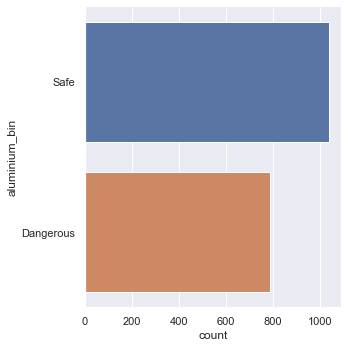

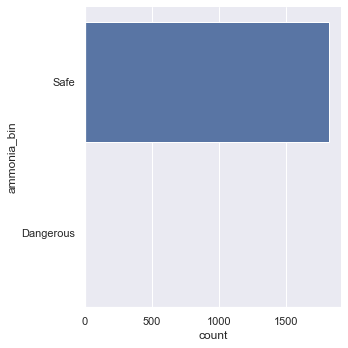

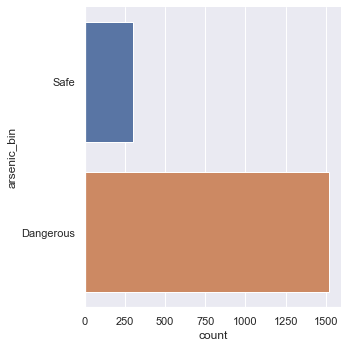

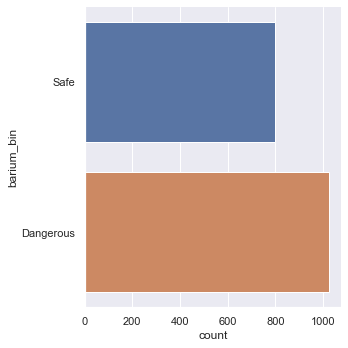

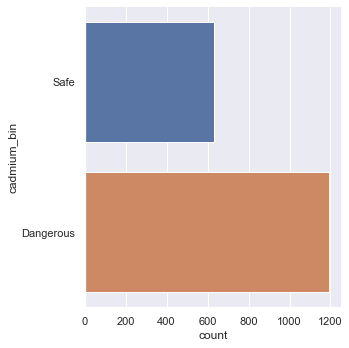

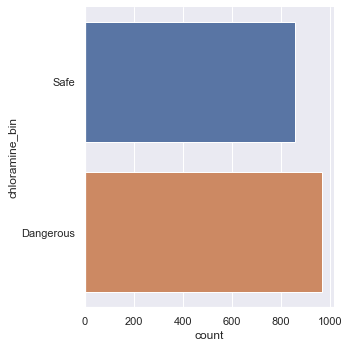

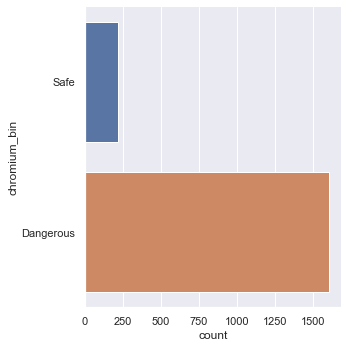

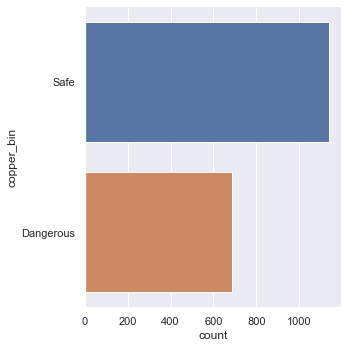

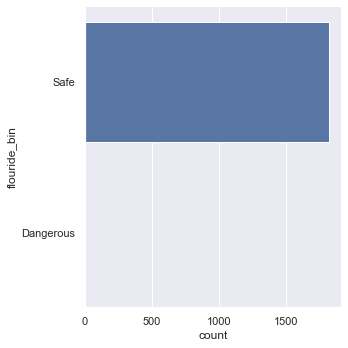

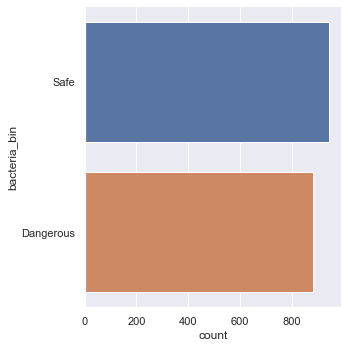

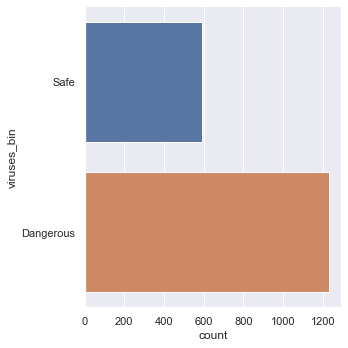

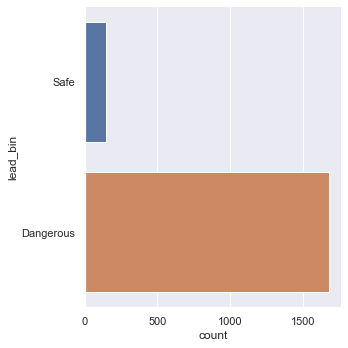

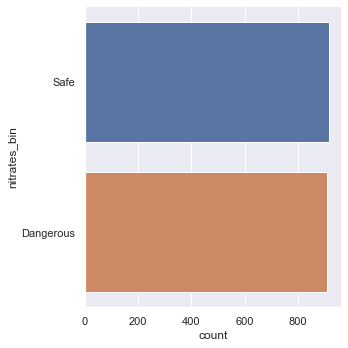

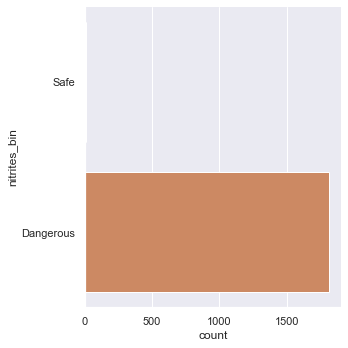

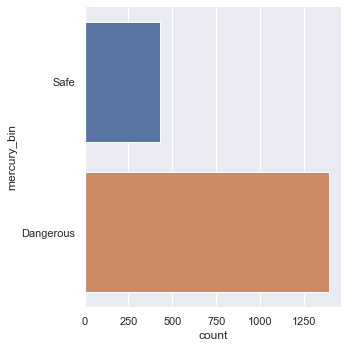

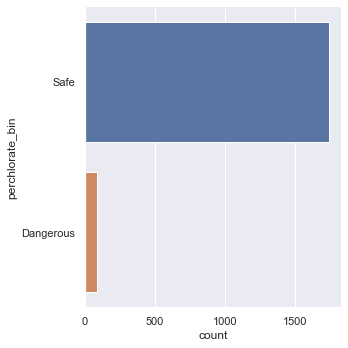

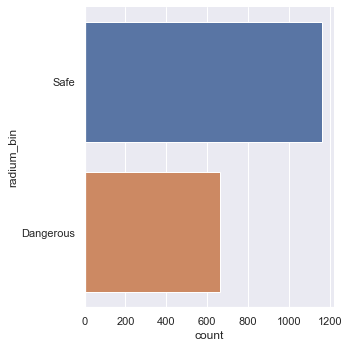

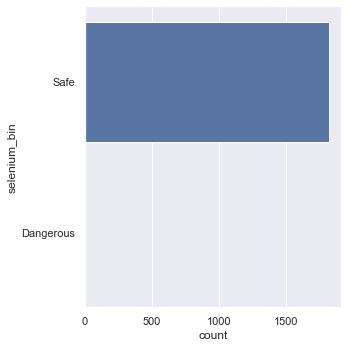

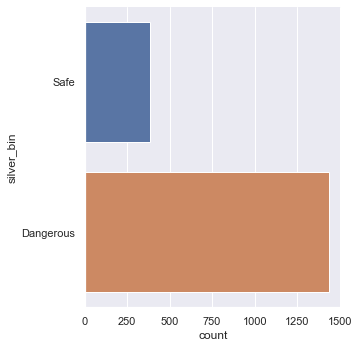

In [26]:
for y in OriginalDataForLDA.columns.values.tolist()[21:41]:
    sb.catplot(y = y, data = OriginalDataForLDA, kind = "count")

Number Safe : 912
Safe         514
Dangerous    398
Name: aluminium_bin, dtype: int64
Safe         908
Dangerous      0
Name: ammonia_bin, dtype: int64
Dangerous    887
Safe          25
Name: arsenic_bin, dtype: int64
Dangerous    568
Safe         344
Name: barium_bin, dtype: int64
Dangerous    849
Safe          63
Name: cadmium_bin, dtype: int64
Dangerous    494
Safe         418
Name: chloramine_bin, dtype: int64
Dangerous    803
Safe         109
Name: chromium_bin, dtype: int64
Safe         568
Dangerous    344
Name: copper_bin, dtype: int64
Safe         912
Dangerous      0
Name: flouride_bin, dtype: int64
Safe         708
Dangerous    204
Name: bacteria_bin, dtype: int64
Dangerous    572
Safe         340
Name: viruses_bin, dtype: int64
Dangerous    825
Safe          87
Name: lead_bin, dtype: int64
Dangerous    471
Safe         441
Name: nitrates_bin, dtype: int64
Dangerous    910
Safe           2
Name: nitrites_bin, dtype: int64
Dangerous    696
Safe         216
Name: mercury_bin, 

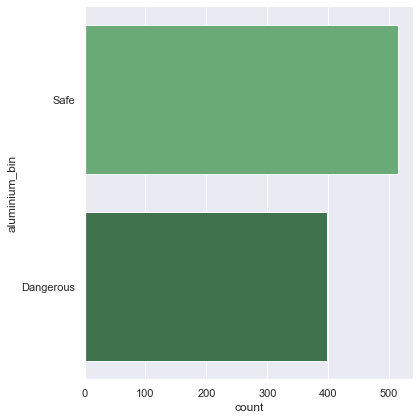

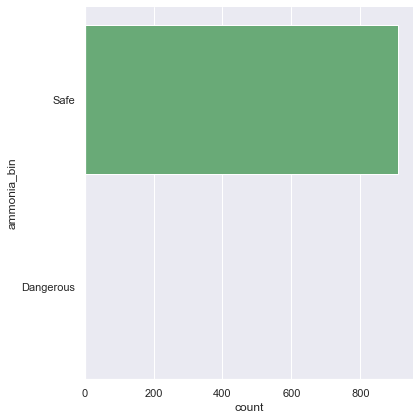

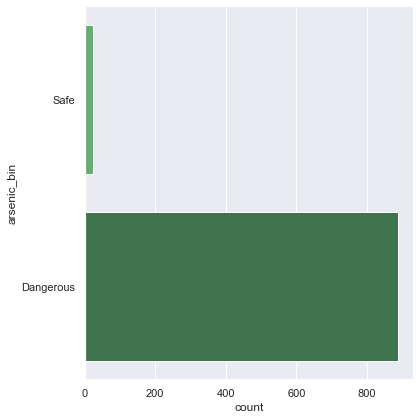

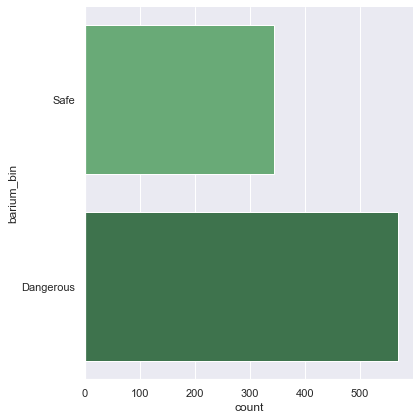

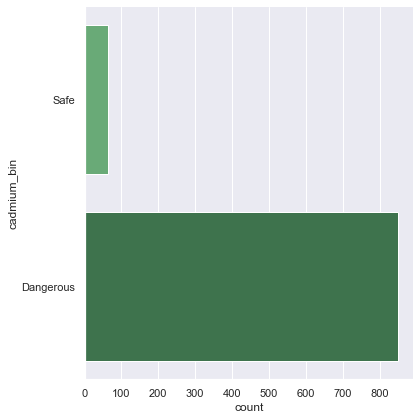

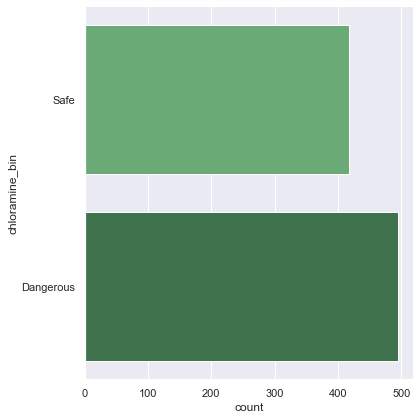

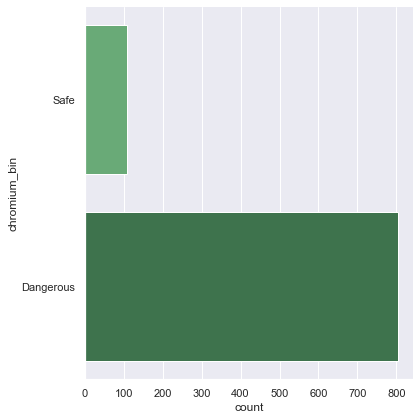

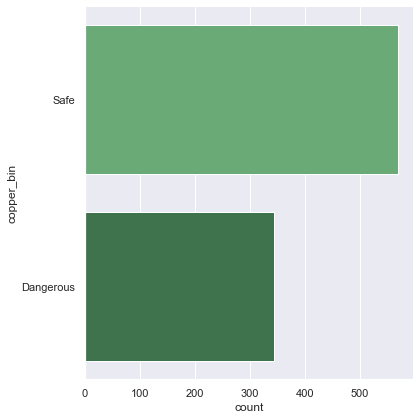

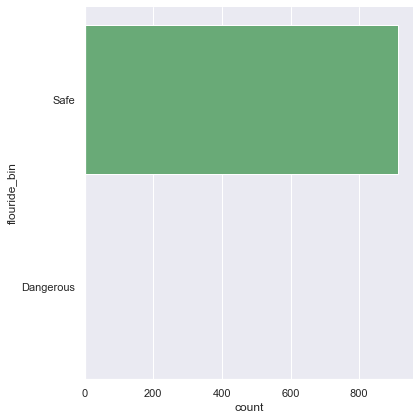

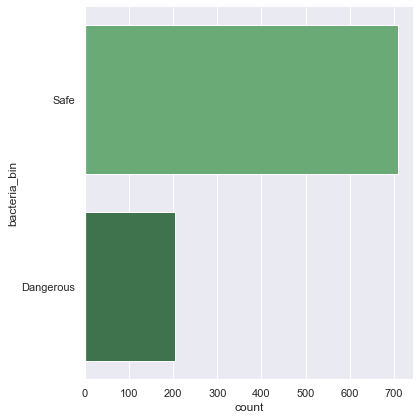

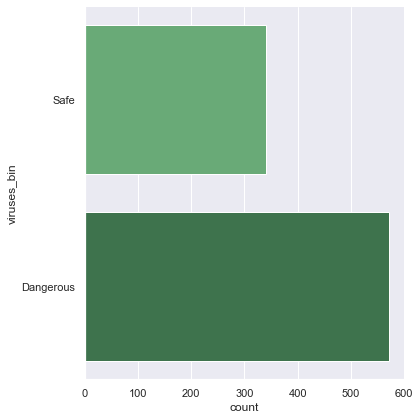

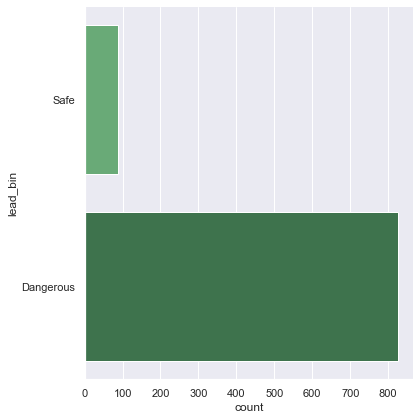

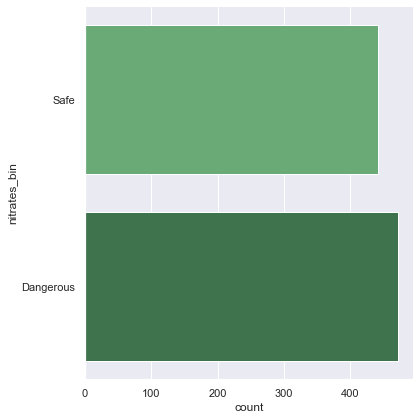

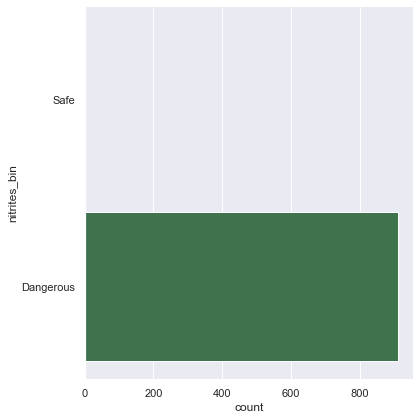

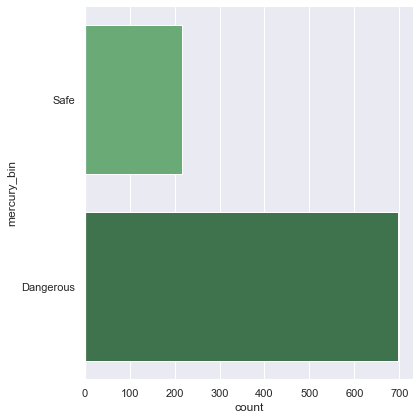

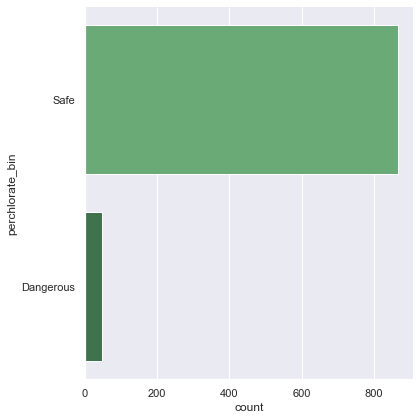

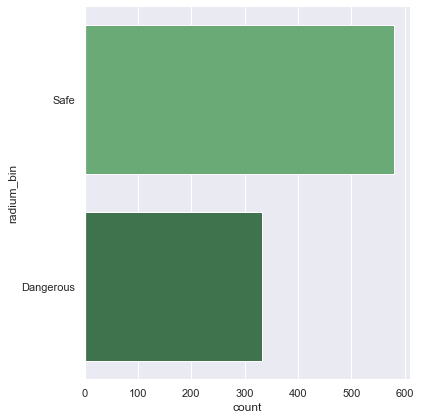

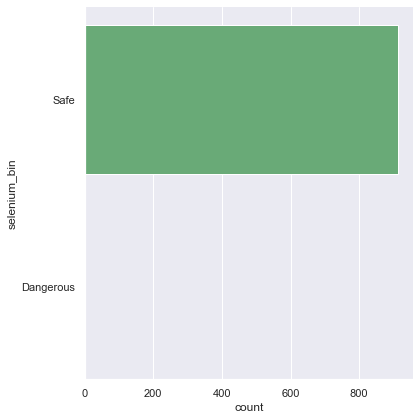

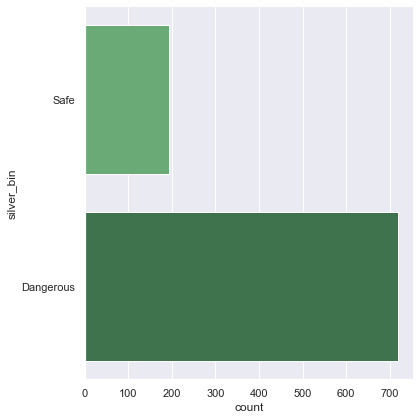

In [27]:
## finding the trend between overall is_safe (where is_safe==1) and the safe/dangerous regulators between each categories

NewData = OriginalDataForLDA[OriginalDataForLDA["is_safe"] == '1']
print("Number Safe :", len(NewData))

for j in NewData.columns.values.tolist()[21:42]:
# Legendary Pokemons in each Generation
    print(NewData[j].value_counts())
    sb.catplot(y = j, data = NewData, kind = "count", height = 6, palette="Greens_d")

#### Finding the trend between overall `is_safe` (where `is_safe`==1) and the `safe` or `dangerous` indications for each category.

`txtdata` displays the safe/dangerous indicators for each of the elements(different indicator for every single element)

For example "aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5"

From here, it shows that the individual safe/dangerous indications from `txtdata` are incomprehensive to show whether they are correlated to `is_safe`. Taking `arsenic_bin` for example, under their own indicator, a majority of `arsenic` values are denoted as dangerous. With `is_safe` set to only `1`, we can see that majority of the `arsenic` level is still indicated as `dangerous`, therefore, making it inconclusive to use individual elements' safe/dangerous indicators to predict `is_safe`.

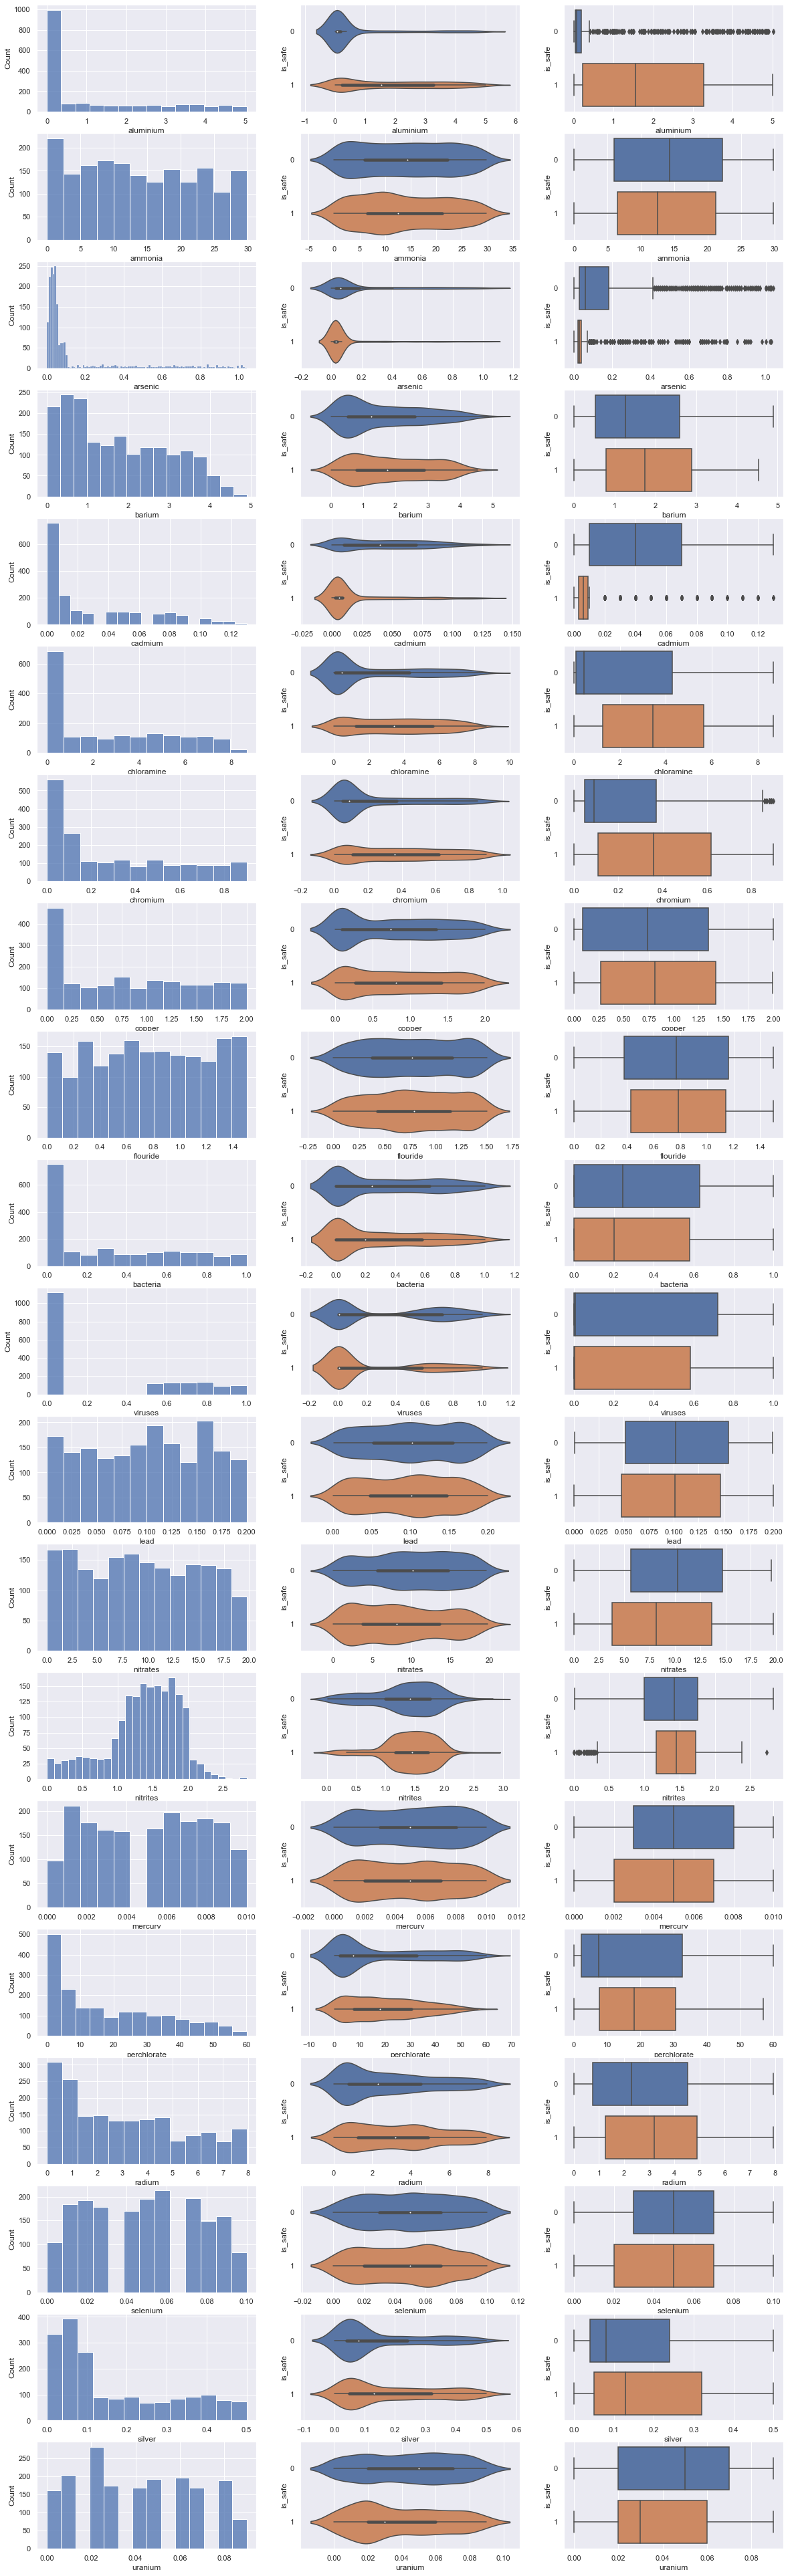

In [28]:
f, axes = plt.subplots(20, 3, figsize=(20, 70))
i=0
for y in OriginalDataForLDA.columns.values.tolist()[0:20]:
    
    sb.histplot(data = OriginalDataForLDA, x = y, ax=axes[i,0])
    sb.violinplot(data = OriginalDataForLDA,x=y,y='is_safe', ax = axes[i,1])
    sb.boxplot(data = OriginalDataForLDA, x=y,y='is_safe',orient = "h", ax = axes[i,2])
    i=i+1;

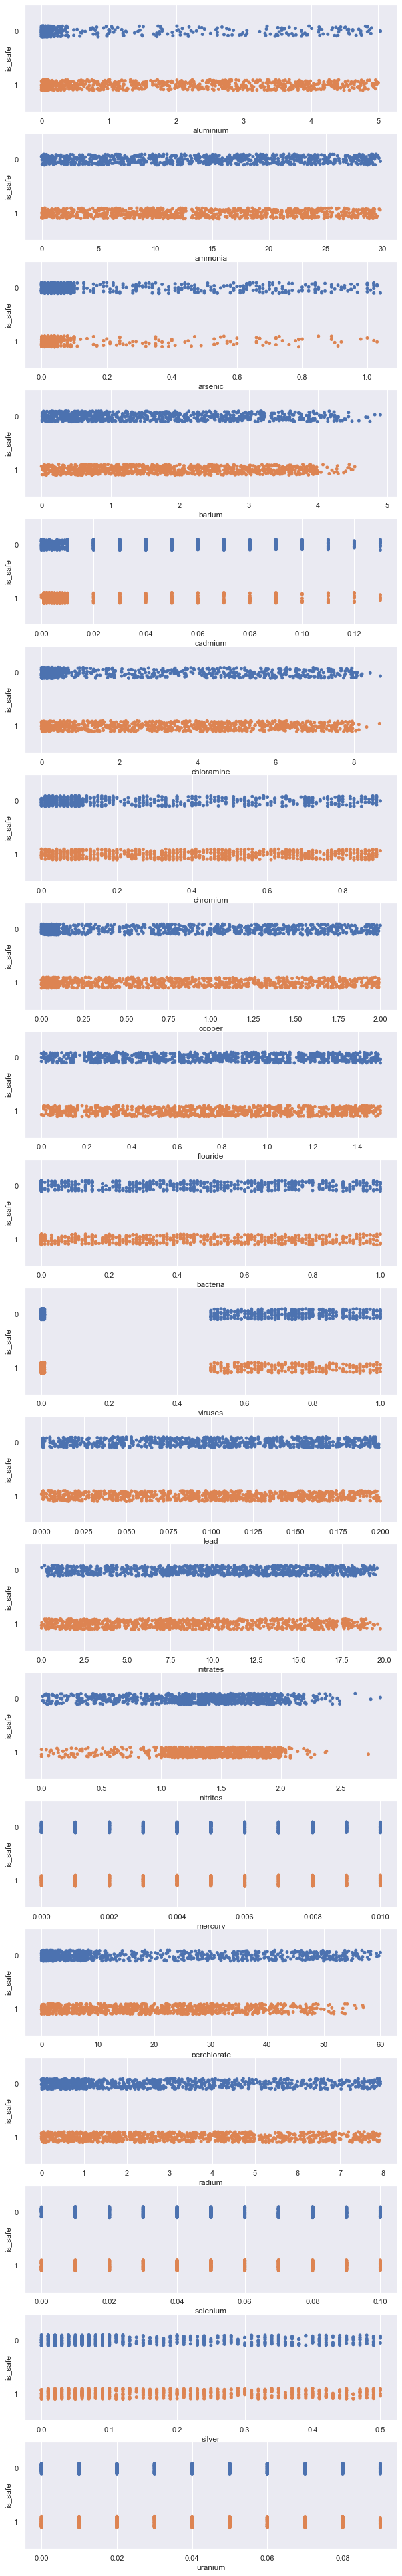

In [29]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.stripplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/gaoyangsu/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


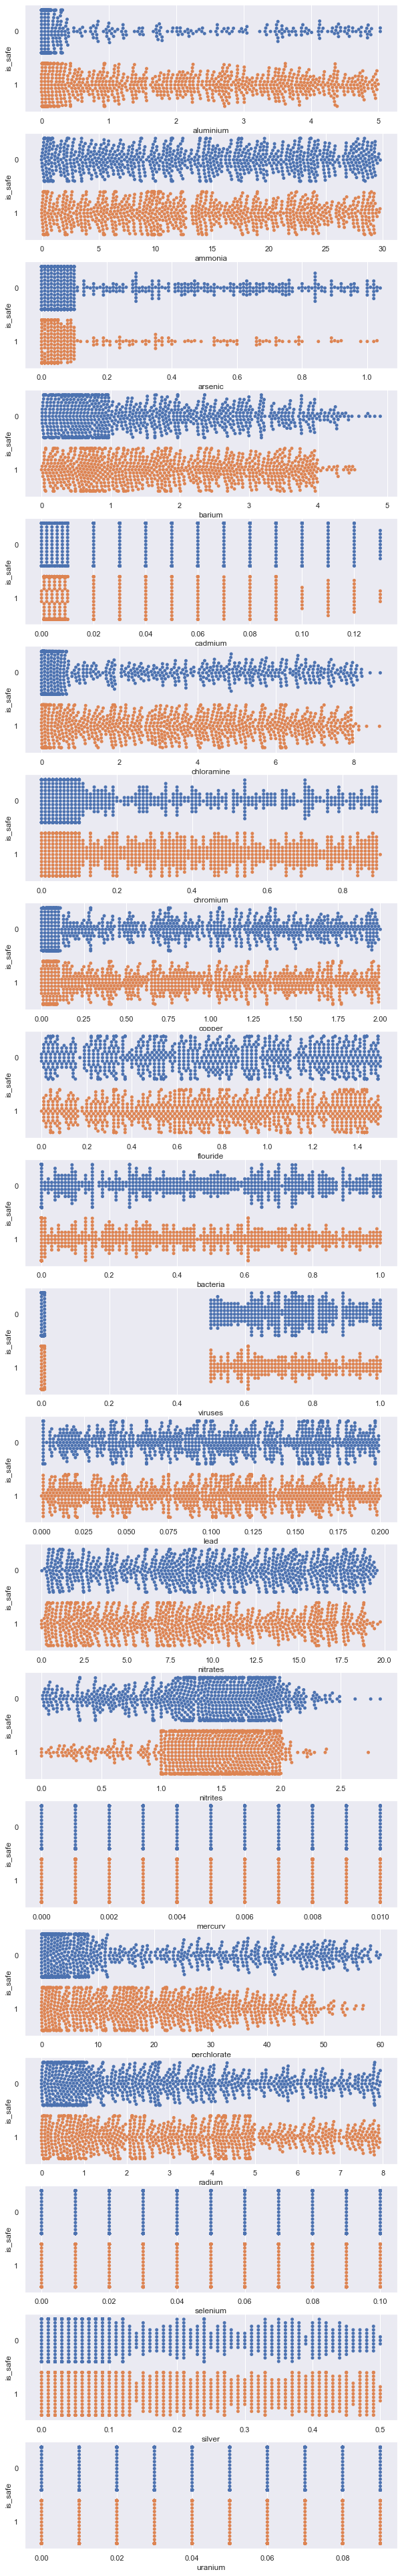

In [30]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.swarmplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

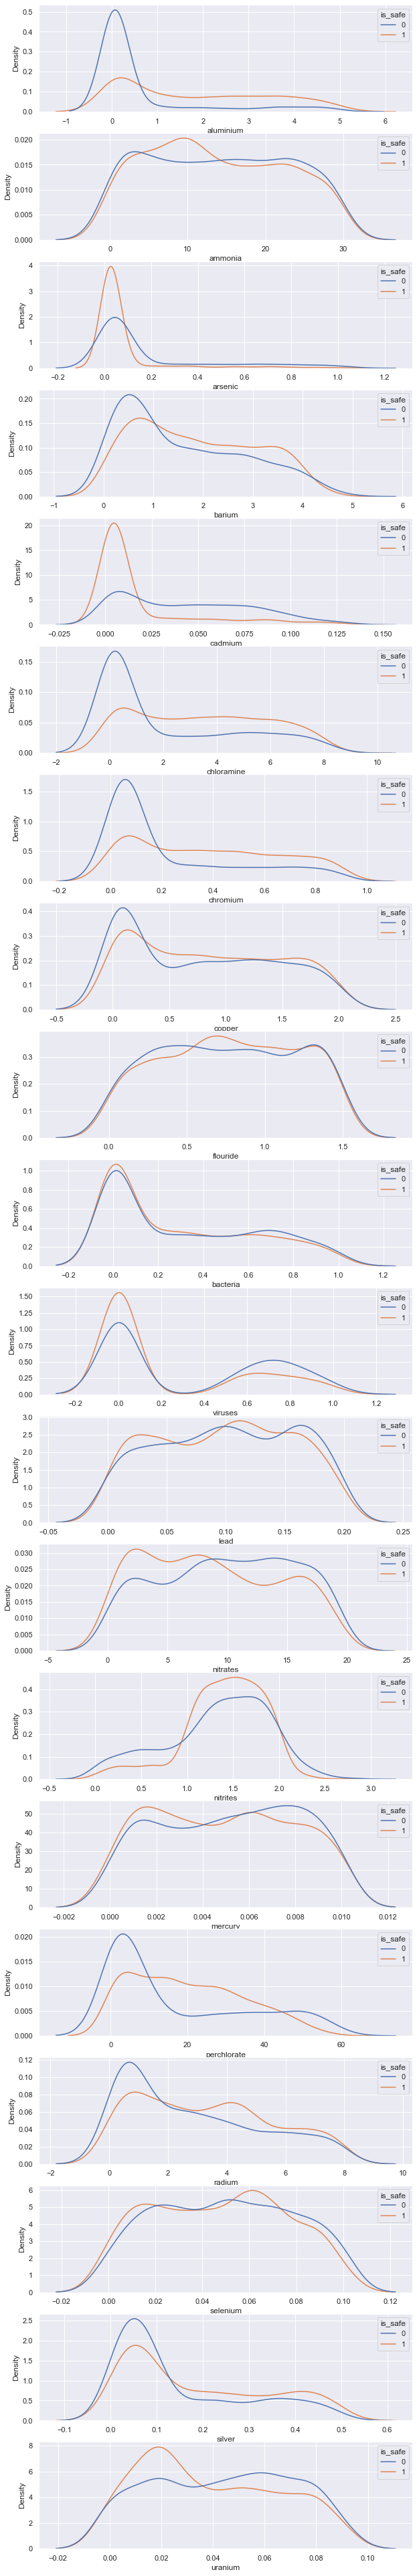

In [31]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.kdeplot(x = j, hue = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

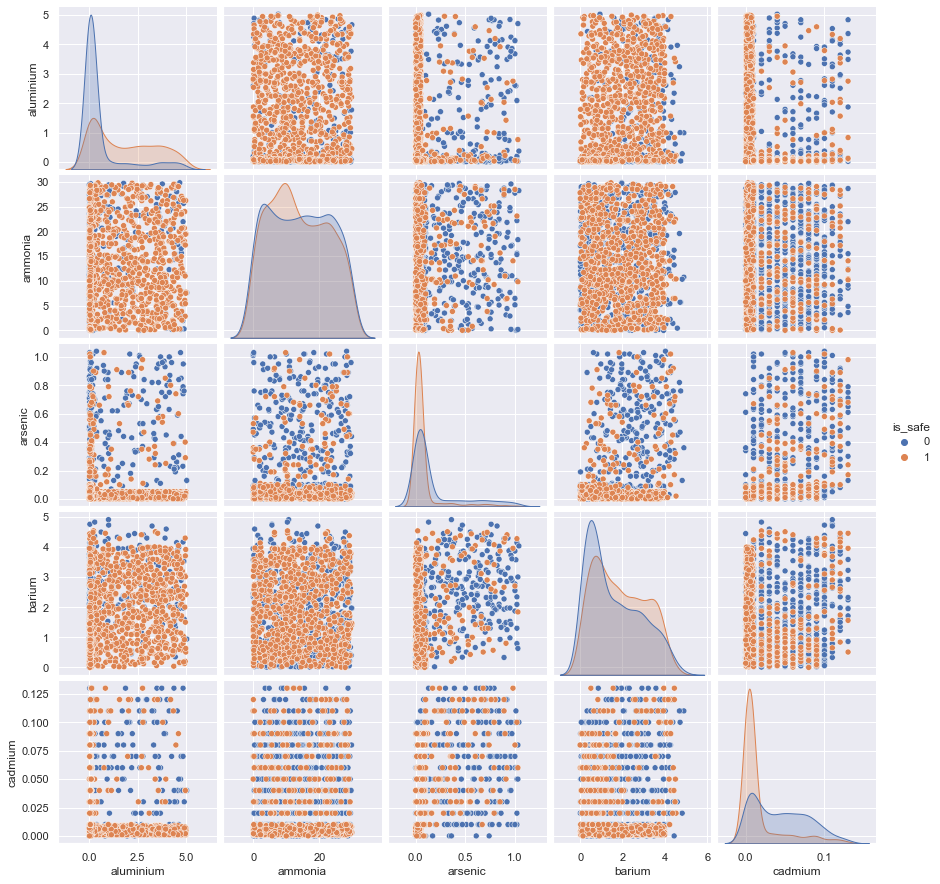

In [32]:
sb.pairplot(OriginalDataForLDA,vars = OriginalDataForLDA.iloc[:,0:5], hue="is_safe")

Through the analysis of all the plots, we have come to a conclusion that `Uranium`, `Arsenic` and `Cadmium` have the highest chance of influencing the decision of safe water.

If we look at some of the negative examples: `Barium`,`Bacteria`,`Nitrates`:
Such features have  __similar percentages__ between __Safe and Unsafe__; Inconclusive to predict based on such features.(e.g., bacteria, with an approximate 50% percentage for both safe and unsafe.)

Furthermore, they share similar density plots. 
For example, for each value (0.0, 0.2, 0.4, etc) of bacteria on density plot, a similar density is observed for safe and unsafe categories, so using difference in terms density between safe and unsafe categories do not lead to meaningful interpretations. 

Therefore, such features would not be taken into account. 


__Some examples__ of __meaningful interpreations__ : 
<ul>
    <li>The contrast between density plot, i.e. left-skewed for is_safe==1 and right skewed for is_safe==0, then can tell us that the higher the amount of the specific element, the less safe it gets. </li>
    <li>The contrast between boxplots and histplots: is_safe==0 data for a specific variable has its interquatile range of boxplots smaller than is_safe==1 (i.e. Q3 for is_safe==1 for cadium is even smaller than Q1 for is_safe==0) </li>
    <li>The mode of the amount of the variable is higher for is_safe==1, compared to is_safe==0, at a lower amount. (i.e. for cadmium, although the mode is similar between 0.000- 0.025 for BOTH is_safe==0 and is_safe==1, the density for mode(is_safe==1) is around 20, while density for mode(is_safe==0) is only at around 7. This shows that for is_safe==1, there is definitely a higher percetage of the variable with lower amounts, compared to is_safe==0)</li>
</ul>

For `arsenic`, __mode__ for safe for Arsenic has __higher density percentage__, at a lower value(left skewed), compared to unsafe for Arsenic. 

From the __stripplot__, it can be observed that at higher `arsenic` values, the density for unsafe is higher as compared to safe, as the scatters are less scarce for unsafe in comparison with safe.

Therefore it can inferred that higher arsenic values might have correlation with the water being unsafe. 

Similarly for `cadmium`, we can see that the __mode__ of safe has a higher density percentages at a lower value, as compared to unsafe. Also the __boxplot__ for safe is smaller than for unsafe, as we can see __boxplot__ for `cadmium`(is_safe==1) has its __Q3__ even smaller than the Q1 for __boxplot__ for `cadmium`(is_safe==0).

For `uranium`, we can see that the __violin plot__ is skewed oppositely with the safe values concentrated on lower ends, and unsafe values on higher ends. 






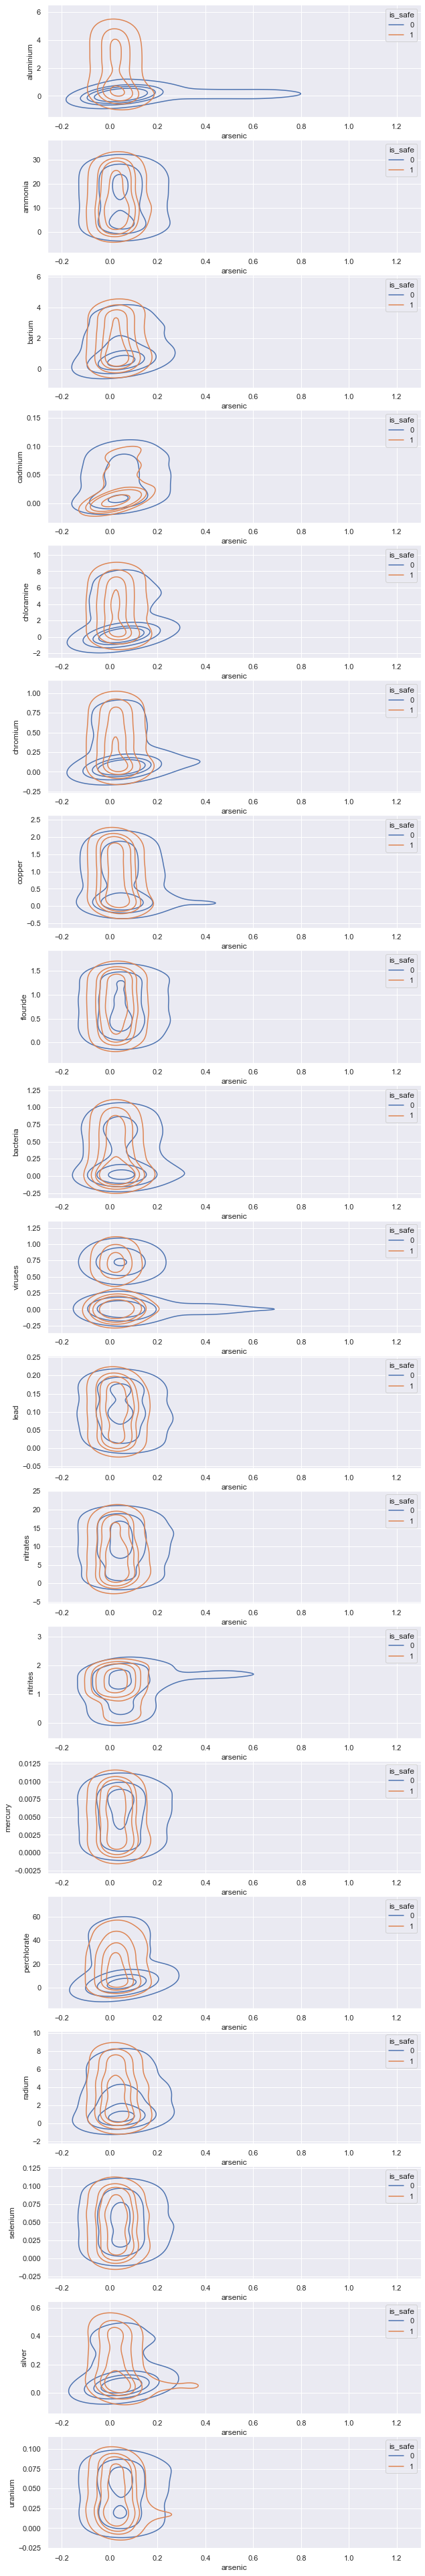

In [56]:
f, axes = plt.subplots(19, 1, figsize=(10, 70))
i=0
for y in DataCopy.columns.values.tolist()[0:20]:
    if y=="arsenic":
        continue
    sb.kdeplot(data=DataCopy, x="arsenic", y=y, hue="is_safe",levels=5, thresh=.2, ax=axes[i])
    i=i+1

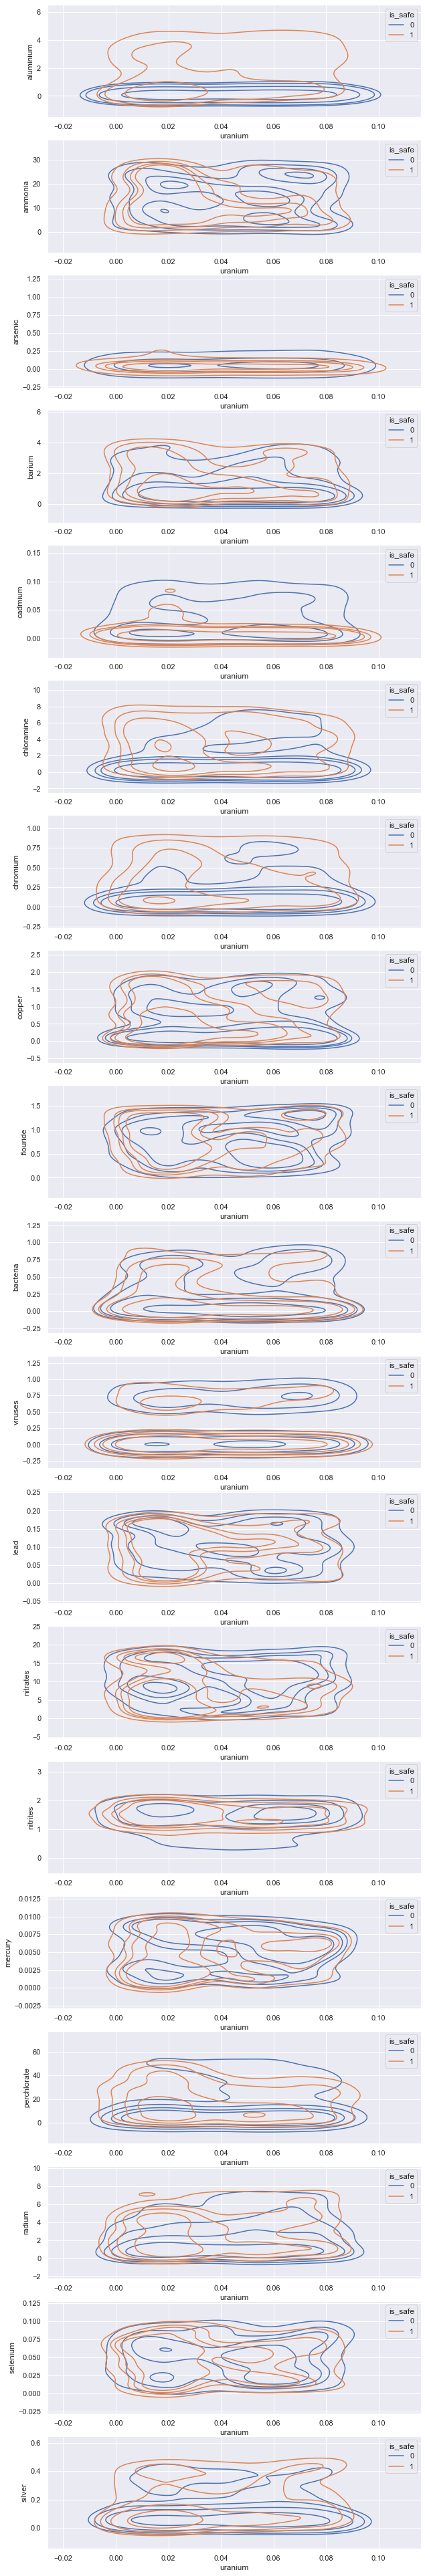

In [57]:
f, axes = plt.subplots(19, 1, figsize=(10, 70))
i=0
for y in DataCopy.columns.values.tolist()[0:20]:
    if y=="uranium":
        continue
    sb.kdeplot(data=DataCopy, x="uranium", y=y, hue="is_safe",levels=5, thresh=.2, ax=axes[i])
    i=i+1

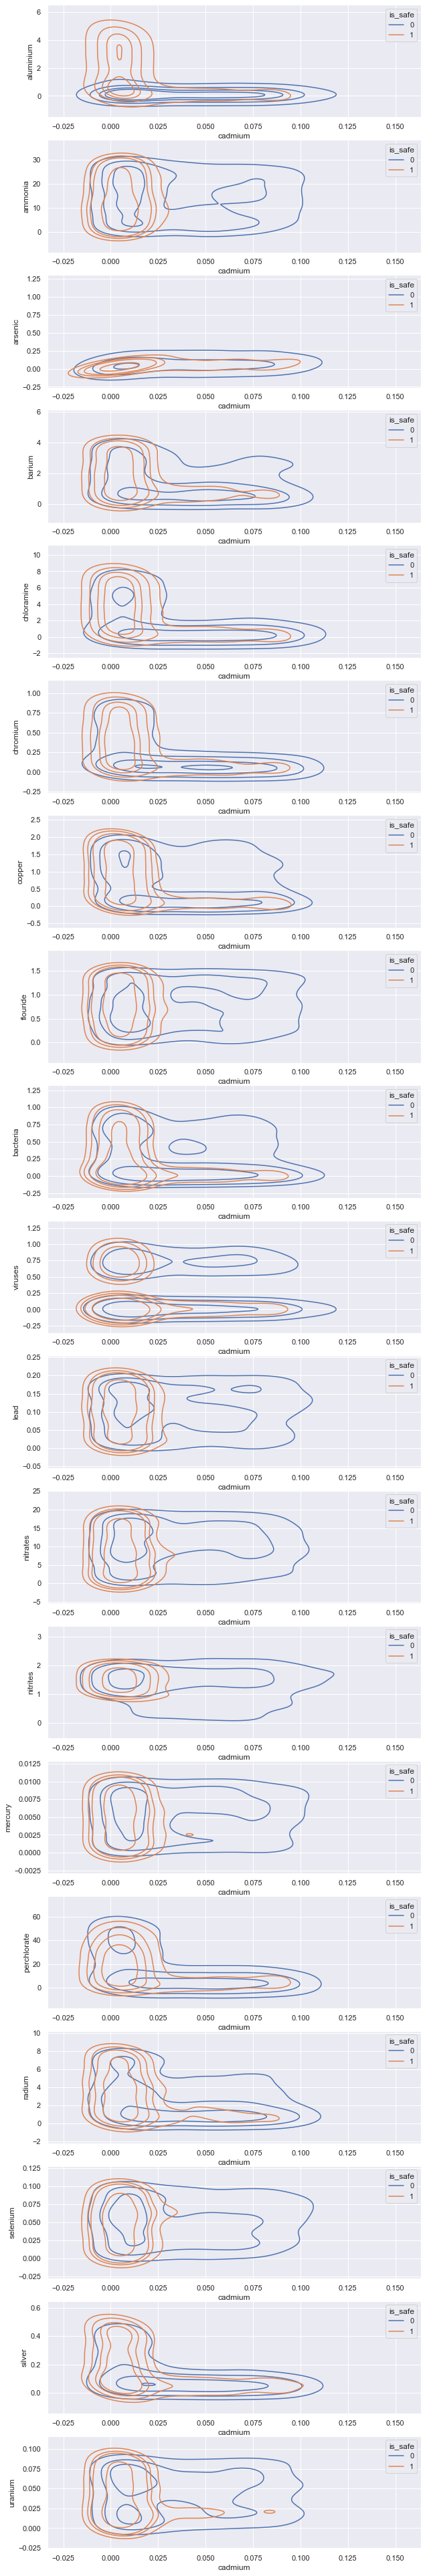

In [58]:
f, axes = plt.subplots(19, 1, figsize=(10, 70))
i=0
for y in DataCopy.columns.values.tolist()[0:20]:
    if y=="cadmium":
        continue
    sb.kdeplot(data=DataCopy, x="cadmium", y=y, hue="is_safe",levels=5, thresh=.2, ax=axes[i])
    i=i+1

As you can see from the above KDE plots, a higher amount of `cadmium` and `arsenic` increases the tendency of the water quality being `unsafe`, as shown from the bi-variate representation of cadmium, uranium and arsenic with the rest of the elements. 

An increase in x-value, for `cadmium` and `arsenic`, stretches the KDE plot of `is_safe==0` to the right (generally), showing that increase of cadmium and arsenic is related to is_safe=0

### Correlation

Next, we decide use correlation to see if it can affect the mode of safe of the water.

As our independent variable is of __categorical nature__(i.e. __is_safe==1 || is_safe==0__), we cannot directly use the __Pearson coefficient__ that is between both continuous variables. Instead, point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of Pearson’s product-moment correlation, applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale.

For example, a point-biserial correlation can be used to interpret if there is an association between salaries, measured in US dollars, and gender (i.e., your continuous variable would be "salary" and your dichotomous variable would be "gender", which has two categories: "males" and "females"). 


In [33]:
OriginalDataForLDA['TypeInt']=(OriginalDataForLDA['is_safe']=='1').astype(int)
OriginalCorr=OriginalDataForLDA.corr()
OriginalCorrAbs=OriginalDataForLDA.corr().abs()
print(OriginalCorr)

             aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.013107  0.025064  0.268409 -0.286076    0.362105   
ammonia       0.013107  1.000000  0.070599  0.055669  0.011457    0.035204   
arsenic       0.025064  0.070599  1.000000  0.278426  0.443812    0.202224   
barium        0.268409  0.055669  0.278426  1.000000 -0.085994    0.334353   
cadmium      -0.286076  0.011457  0.443812 -0.085994  1.000000   -0.226147   
chloramine    0.362105  0.035204  0.202224  0.334353 -0.226147    1.000000   
chromium      0.342028  0.092757  0.121934  0.262817 -0.273772    0.427017   
copper        0.234206  0.015378 -0.080426  0.090950 -0.214896    0.154006   
flouride     -0.011327 -0.000156  0.028559 -0.014201  0.022159    0.038244   
bacteria     -0.014702  0.047338  0.042767  0.108238 -0.106935    0.156999   
viruses      -0.062145  0.083061  0.040754  0.017105  0.016908    0.024366   
lead          0.045610 -0.060209 -0.062109  0.019363 -0.036303  

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder() 

# Encode categorical values
DataCopy['Safety Encode']=enc.fit_transform(DataCopy[['is_safe']])

# Check encoding results in a crosstab
pd.crosstab(DataCopy['is_safe'], DataCopy['Safety Encode'], margins=False)

Safety Encode  0.0  1.0
is_safe                
0              912    0
1                0  912

<AxesSubplot:>

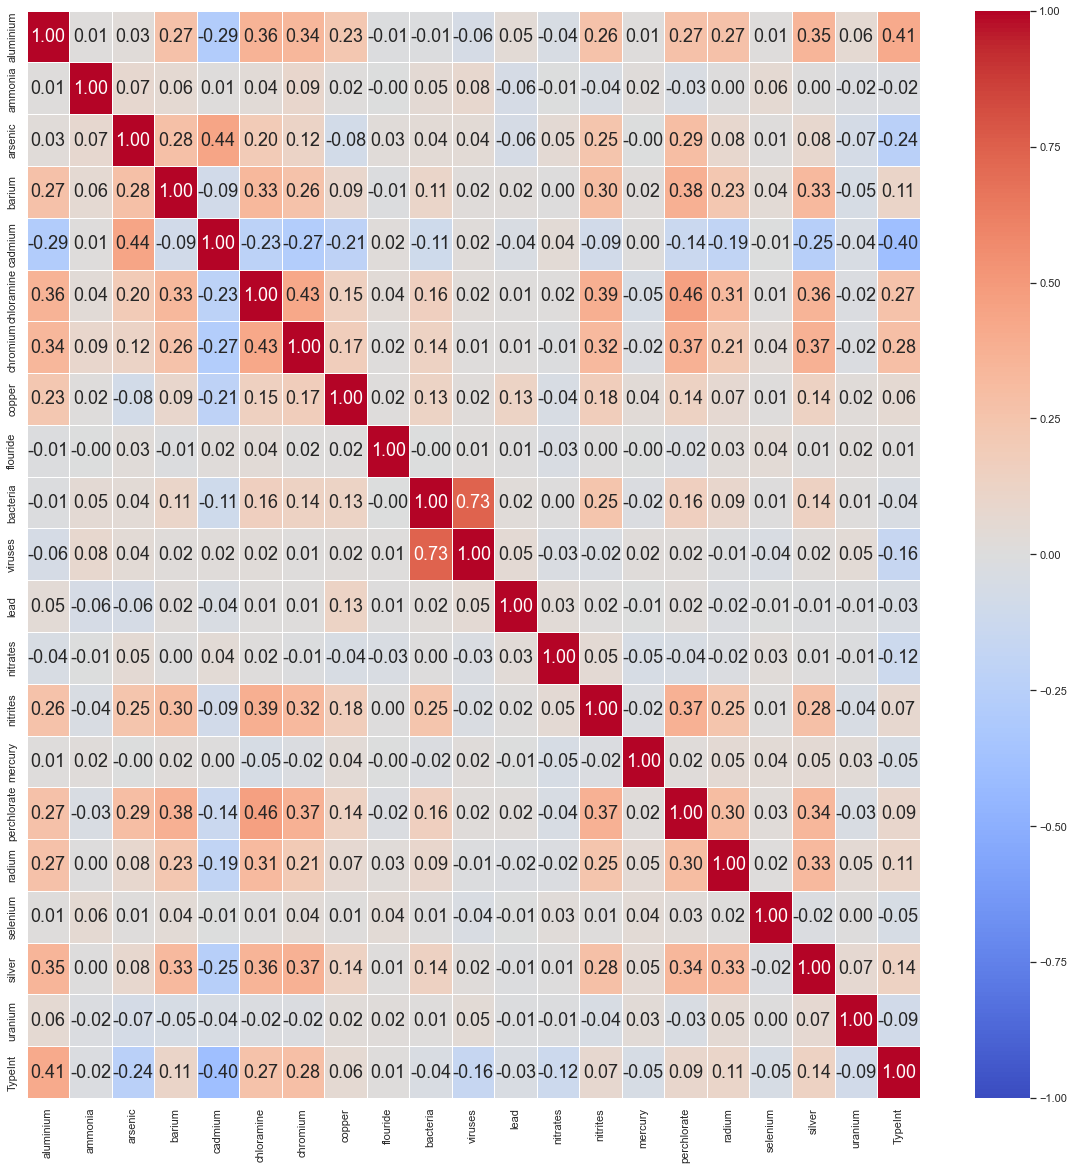

In [35]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(OriginalDataForLDA.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "coolwarm")

In [36]:
CorrWrtSafe=pd.DataFrame(OriginalCorrAbs['TypeInt'])
CorrWrtSafe[['TypeInt']].sort_values(['TypeInt'], ascending=False).head(4)

TypeInt
TypeInt    1.000000
aluminium  0.406579
cadmium    0.396526
chromium   0.281518

In this case we pick the __top 3 absolute values__ of correlation between is_safe and the variables. We pick `aluminium`, `cadmium` and `chromium` as feature importance derived from the correlation method. 

In [37]:
import plotly.express as px # for data visualization

# Skleran
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.tree import DecisionTreeClassifier # for decision tree models

# Sklearn dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
from sklearn.decomposition import PCA # for PCA analysis

In [60]:
fig = px.scatter_3d(OriginalDataForLDA, 
                    x=OriginalDataForLDA['aluminium'], y=OriginalDataForLDA['cadmium'], z=OriginalDataForLDA['chloramine'],
                    color=OriginalDataForLDA['is_safe'],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    hover_data=['chloramine','aluminium', 'cadmium','is_safe'],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

__Red: Safe			Blue: Unsafe__

Cadmium Values are more discrete in nature, with regular gaps in between the data points 
Lower in Cadmium → higher density for safe
Lower in Aluminium → higher density for unsafe
(drag the figure to see better)

